In [2]:
import pandas as pd
from matplotlib.pyplot import *
from dateutil import relativedelta
import scipy as sp
import scipy.stats
import scipy.signal
from scipy.linalg import hankel


def scaled(series):
    return (series - series.mean()) / series.std()

def traj(y, no):
    c = y[0:len(y)-no+1]
    r = y[len(y)-no:len(y)]
    return hankel(c, r)

def filter_series(series, w):
    y = series.values
    T = traj(y, len(w))
    f = np.dot(T, w)

    res = pd.Series(index=series.index)
    res.iloc[-len(f):] = f

    return res

In [10]:
unrate = pd.read_csv('UNRATE.csv')
unrate['DATE'] = pd.to_datetime(unrate.DATE)

snp = pd.read_csv('GSPC.csv')
snp['Date'] = pd.to_datetime(snp.Date)
snp = snp.iloc[:-1, :]  # Remove the latest, it isn't finished yet
snp['Date'] = [d - relativedelta.relativedelta(months=1) for d in snp.Date.dt.to_pydatetime()]  # Fix the timestamps

data = unrate.set_index('DATE').join(snp.set_index('Date'))
data = data.fillna(method='ffill')

In [11]:
N = 101
w = sp.signal.firwin(N, [0.1], pass_zero=True)[:int(np.ceil(N/2))]
data['filtered_unrate'] = filter_series(data.UNRATE, w)

data['unrate_range'] = (data.UNRATE - data.UNRATE.rolling(12).mean()) / data.UNRATE.rolling(12).std()


data['drawdown_12_month'] = (data.Close - data.Close.rolling(12).max()) / data.Close.rolling(12).max()
data['future_drawdown_12_month'] = data['drawdown_12_month'].shift(-12)

data['anual_return'] = (data.Close - data.Close.shift(12)) / data.Close.shift(12)
data['one_year_return'] = data['anual_return'].shift(-12)

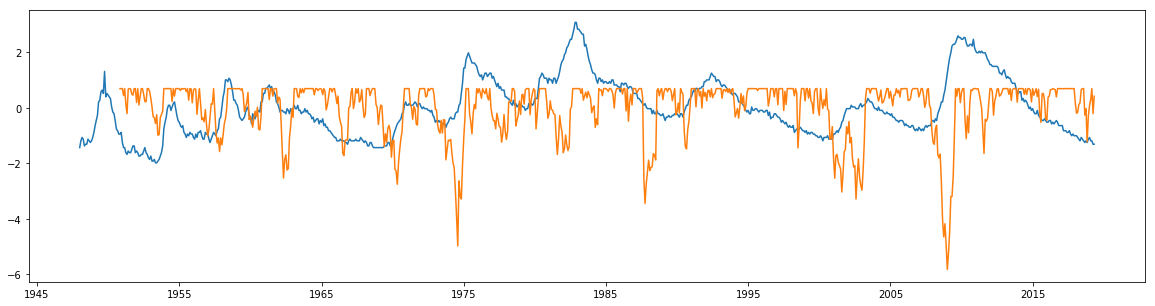

In [14]:
figure(figsize=(20, 5))

plot(scaled(data.UNRATE))
plot(scaled(data.drawdown_12_month))

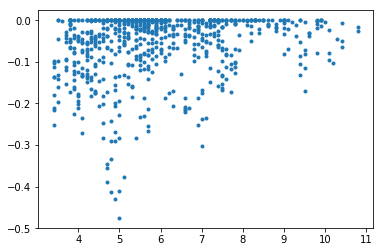

In [278]:
plot(x, y, '.')

# hist(y.values[y.values < 0], 100, log=True);

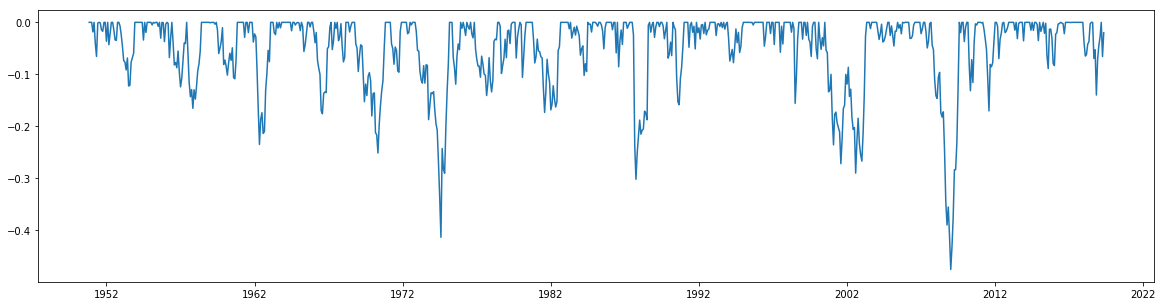

In [238]:
figure(figsize=(20, 5))

x = (data.Close - data.Close.expanding().max()) / data.Close.expanding().max()

x = (data.Close - data.Close.rolling(12).max()) / data.Close.rolling(12).max()

plot(x)

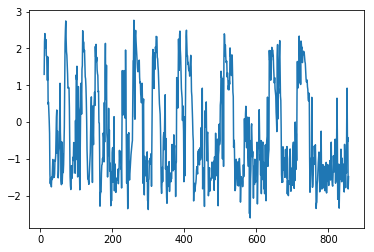

In [220]:
plot((unrate.UNRATE - unrate.UNRATE.rolling(12).mean()) / unrate.UNRATE.rolling(12).std())

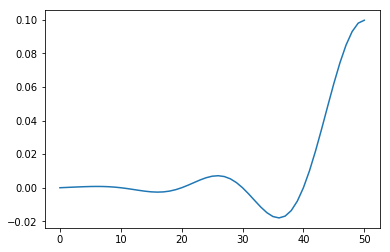

In [196]:
plot(w)

In [288]:
d = data.drawdown_12_month.dropna().values

d < -0.01

array([False, False, False,  True, False,  True,  True, False, False,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False,